<a href="https://colab.research.google.com/github/GoAshim/Deep-Learning-with-TensorFlow/blob/main/04_Binary_Classification_using_TensorFlow_Predict_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solving Binary Classification Problem with Neural Networks using TensorFlow

In this project we will use neural networks in TensorFlow with a simple dataset to predict a binary result (or target feature) indicating whether a person has breast cancer or not based on the other variables (input features) available in the dataset. The scope of this project is to learn the fundamentals of neural network in tensorflow by going through the steps to build and train the model and use the model to predict result with unknown data.

### Step 1 - Import the libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Check version of tensorflow
tf.__version__

'2.15.0'

### Step 2 - Load the data

In [2]:
# Import the dataset

from sklearn.datasets import load_breast_cancer

In [3]:
# Load the data

dt = load_breast_cancer()
type(dt)

sklearn.utils._bunch.Bunch

In [4]:
# Review the data
dt

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
# Check the different elements in the loaded data
dt.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# Create the feature dataset
X = dt['data']
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# Check the datatype and shape of the feature dataset
print("Data type of the feature dataset: ", type(X))
print("Shape of the feature dataset: ", X.shape)

Data type of the feature dataset:  <class 'numpy.ndarray'>
Shape of the feature dataset:  (569, 30)


In [8]:
# Create the label dataset
y = dt['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# Check the datatype and shape of the label dataset
print("Data type of the label dataset: ", type(y))
print("Shape of the label dataset: ", y.shape)

Data type of the label dataset:  <class 'numpy.ndarray'>
Shape of the label dataset:  (569,)


In [10]:
# Check the names of the features
dt.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
dt.target_names

# We saw that the target has values as 0 and 1. So it means 0 stands for malignant breast cancer and 1 stands for benign breast cancer

array(['malignant', 'benign'], dtype='<U9')

So from the above code, we see that our feature dataset has 569 samples and 30 features and our label dataset has 569 samples. We will use these feature and target datasets for our subsequent machine learning model.

### Step 3 - Exploratory Data Analysis
In this step we will explore the features in the dataset and see how their values are distributed.

In [12]:
# load the features dataset into pandas dataframe
df = pd.DataFrame(dt['data'], columns=dt.feature_names)

In [13]:
# Review the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# Check the datatype of columns in the dataframe
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

So all columns in the feature set is numeric, which is suitable for neural network model and we don't have to do any data type conversion.

In [15]:
# Check if any missing value in the feature dataset
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

So no columns in the feature set has any missing values, which is suitable for neural network model.

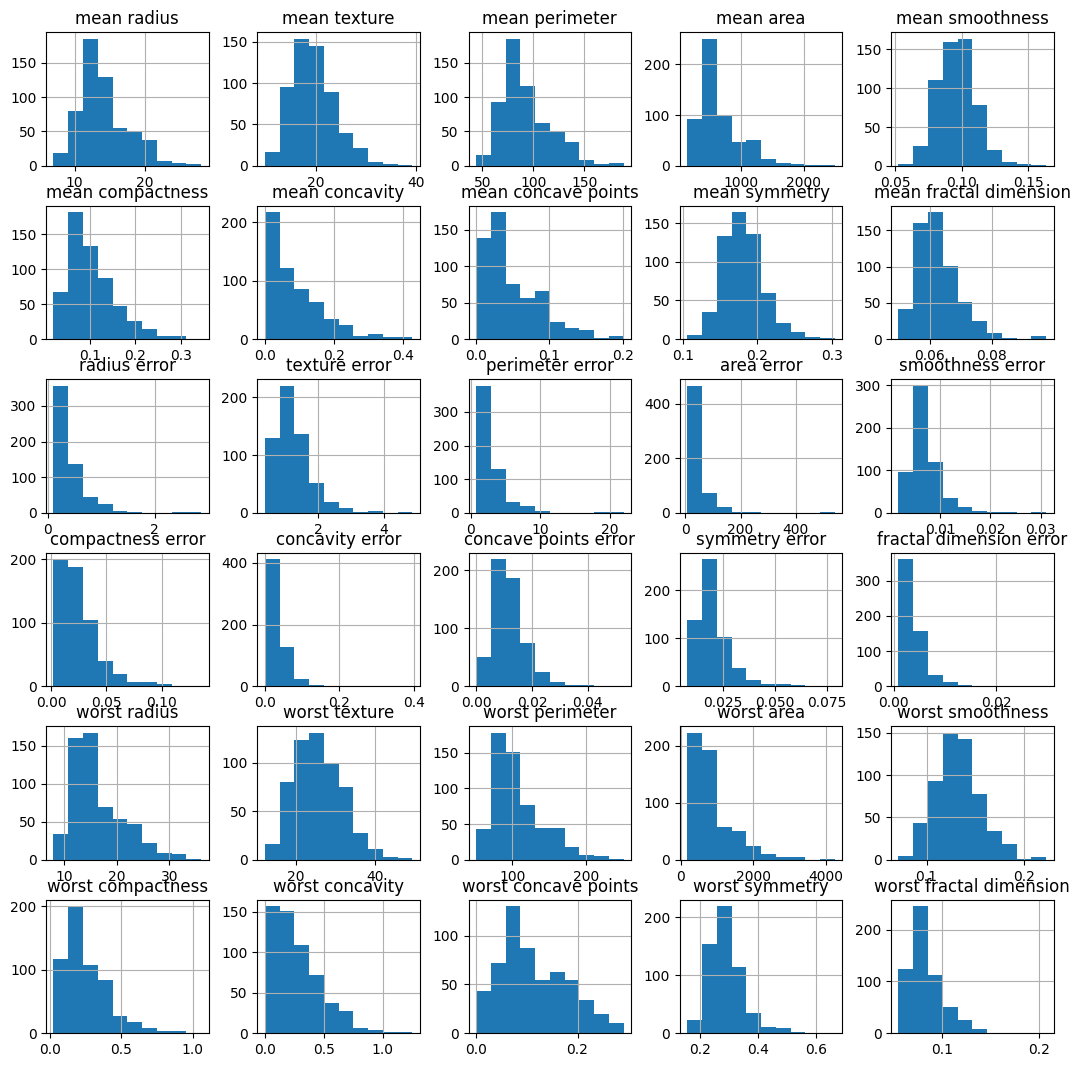

In [16]:
# Plot histogram of all features to see how their values are distributed.
df.hist(figsize=[13, 13])
plt.show();

### Step 4 - Split the data for training and testing

In [17]:
# Import necessary library
from sklearn.model_selection import train_test_split

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Check the shape of the training and test datasets
print("Shape of the feature dataset for training: ", X_train.shape)
print("Shape of the feature dataset for testing: ", X_test.shape)
print("Shape of the label dataset for training: ", y_train.shape)
print("Shape of the label dataset for testing: ", y_test.shape)

Shape of the feature dataset for training:  (455, 30)
Shape of the feature dataset for testing:  (114, 30)
Shape of the label dataset for training:  (455,)
Shape of the label dataset for testing:  (114,)


### Step 5 - Feature Scaling

In [20]:
# Import the Standard Scaler library
from sklearn.preprocessing import StandardScaler

In [21]:
# Instantiate the Standard Scaler
sc = StandardScaler()

# Fit the Standard Scaler on the training features
sc.fit(X_train)

# Transform both training and test features using the trained Standard Scaler
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
# Check a sample record in the X_train_scaled dataset
X_train_scaled[0]

array([-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
        0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
       -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
        3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
       -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
        1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014])

In [23]:
# Check the corresponding record in the original X_train dataset
X_train[0]

array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

In [24]:
# Check a sample record in the X_test_scaled dataset
X_test_scaled[0]

array([-0.46649743, -0.13728933, -0.44421138, -0.48646498,  0.28085007,
        0.04160589, -0.11146496, -0.26486866,  0.41524141,  0.13513744,
       -0.02091509, -0.29323907, -0.17460869, -0.2072995 , -0.01181432,
       -0.35108921, -0.1810535 , -0.24238831, -0.33731758, -0.0842133 ,
       -0.2632354 , -0.14784208, -0.33154752, -0.35109337,  0.48001942,
       -0.09649594, -0.03583041, -0.19435087,  0.17275669,  0.20372995])

In [25]:
# Check a sample record in the original X_test dataset
X_test[0]

array([1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02, 1.058e-01,
       8.005e-02, 3.821e-02, 1.925e-01, 6.373e-02, 3.961e-01, 1.044e+00,
       2.497e+00, 3.029e+01, 6.953e-03, 1.911e-02, 2.701e-02, 1.037e-02,
       1.782e-02, 3.586e-03, 1.497e+01, 2.464e+01, 9.605e+01, 6.779e+02,
       1.426e-01, 2.378e-01, 2.671e-01, 1.015e-01, 3.014e-01, 8.750e-02])